# Quantum Tunneling using Qiskit
**_Narendra N. Hegade, Nachiket L. Kortikar, Bikramaditya Das, Bikash K. Behera, and Prasanta K. Panigrahi, "Experimental Demonstration of Quantum Tunneling in IBM Quantum Computer", 2021_**

In [113]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit import IBMQ, Aer, execute, assemble, transpile
from qiskit.quantum_info import Statevector

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [114]:
def qft(size):
    circuit = QuantumCircuit(size)

    for qubit in range(size-1, -1, -1):
        circuit.h(qubit)
        for otherqubit in range(qubit-1, -1, -1):
            angle = (2*np.pi)/(2**(qubit - otherqubit + 1))
            circuit.cp(angle, otherqubit, qubit)
    
    for qubit in range(size//2):
        circuit.swap(qubit, size - qubit - 1)
    
    qft = circuit.to_gate()
    qft.name = "QFT" + str(size)

    return qft

def qft_dagger(size):
    qft_gate = qft(size)
    qft_dag = qft_gate.inverse()
    qft_dag.name = "INV_QFT"+str(size)
    return qft_dag

In [118]:
step = 4
dt = 0.1
v = 50
m = 0.5

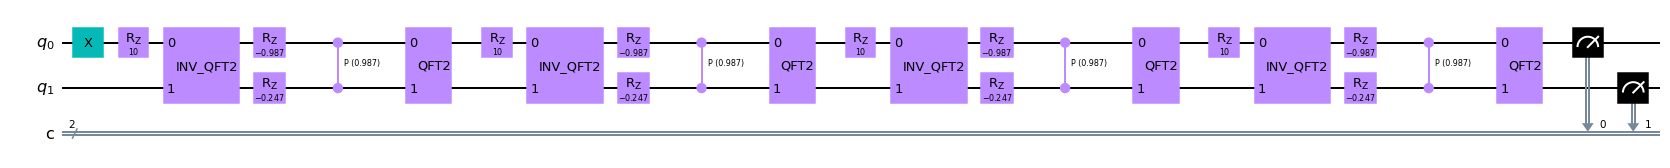

In [129]:
circuit = QuantumCircuit(2,2)
circuit.x(0) # Particle initially at |01>

for _ in range(step):
    # Potential Energy Operator
    circuit.rz(2*dt*v, 0) # --> Barrier at |00> and |10>

    # Inverse QFT
    circuit.append(qft_dagger(2), range(2))

    # Kinetic Energy Operator
    circuit.rz(-(np.pi**2/8)*2*4*dt, 0)
    circuit.rz(-(np.pi**2/8)*2*dt, 1)
    circuit.cp((np.pi**2/8)*2*4*dt, 0, 1)

    # QFT
    circuit.append(qft(2), range(2))

circuit.measure(range(2), range(2))

circuit.draw("mpl", fold=-1)

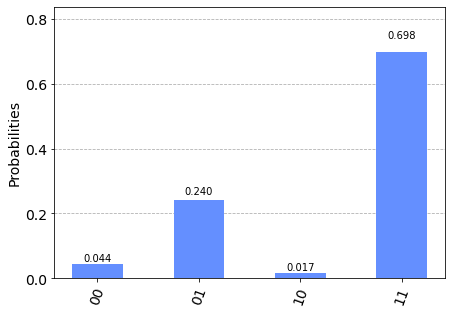

In [130]:
backend = Aer.get_backend("qasm_simulator")
job = execute(circuit, backend, shots=2048)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)